# Sentiment Classification

In [1]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train

--2024-05-26 09:10:32--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/sentiment_train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447555 (437K) [text/plain]
Saving to: ‘sentiment_train’

sentiment_train     100%[===================>] 437.07K  --.-KB/s    in 0.01s   

2024-05-26 09:10:33 (33.1 MB/s) - ‘sentiment_train’ saved [447555/447555]



In [3]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('sentiment_train', delimiter='\t')
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [4]:
pd.set_option('max_colwidth',800)
train_df.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [5]:
train_df[train_df['sentiment']==1].head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [6]:
train_df[train_df['sentiment']==0].head()

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


## Exploration of Dataset

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


<ipython-input-18-9002e4c56bcf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment', data=train_df, palette='viridis')


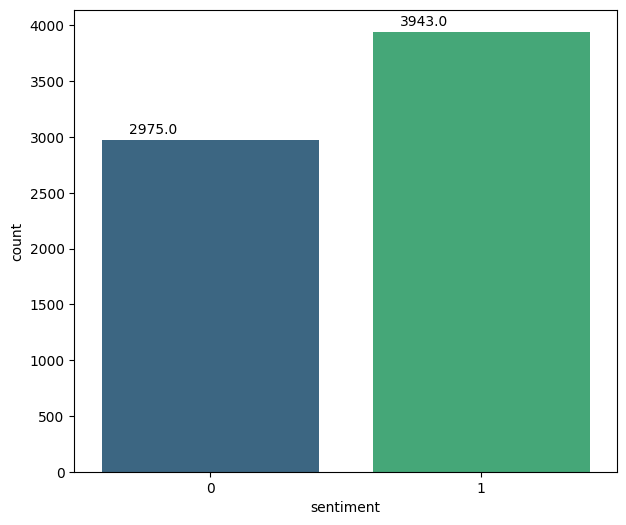

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
ax = sns.countplot(x='sentiment', data=train_df, palette='viridis')
# Annotation
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))


## Text preprocessing

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:3]}")

Total length of vocabulary is 2132, examples are ['00' '007' '10']


In [24]:
train_df_features = cv.transform(train_df['text'])
train_df_features

<6918x2132 sparse matrix of type '<class 'numpy.int64'>'
	with 65398 stored elements in Compressed Sparse Row format>

In [25]:
train_df_features.getnnz()

65398

train_df_features.getnnz() akan memberi Anda jumlah elemen dalam matriks tersebut yang bukan nol.

In [26]:
65398/(6918*2132) * 100

0.4434010415225908

In [27]:
train_df_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [30]:
train_df2 = pd.DataFrame(train_df_features.todense(), columns=features)
train_df2.head()

,00,007,10,10pm,12,16,17,1984,1st,200,...,yip,you,young,younger,your,yuck,yuh,zach,zen,µª
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_df2.iloc[0:2,150:158]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward,axes
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0


In [32]:
train_df.head(2)

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


In [33]:
train_df2[['the', 'da','vinci','awesome','just','book']] [:2]

,the,da,vinci,awesome,just,book
0,1,1,1,1,1,1
1,1,1,1,0,0,0


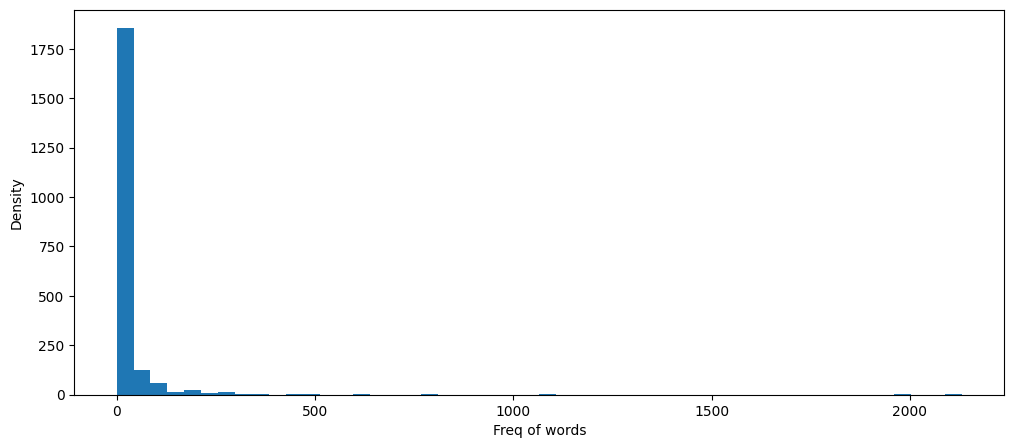

In [40]:
feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                      counts = feature_counts))
plt.figure(figsize=(12,5))
plt.hist(feature_count_df.counts, bins=50, range=(0,2132))
plt.xlabel('Freq of words')
plt.ylabel('Density')
plt.show()

In [38]:
feature_count_df[feature_count_df['counts']==1]

,features,counts
0,00,1
1,007,1
3,10pm,1
4,12,1
5,16,1
...,...,...
2125,younger,1
2127,yuck,1
2128,yuh,1
2129,zach,1


In [39]:
feature_count_df.head()

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1


In [43]:
cv = CountVectorizer(max_features=1000)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts=feature_counts))

feature_count_df.sort_values('counts', ascending=False).head(10)

Total length of vocabulary is 1000, examples are ['10' '17' '33' '6th' 'aaron']


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


## Removing the Stop Words

In [44]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as my_stop_words

In [45]:
my_stop_words = my_stop_words.union(['harry','potter','code','vinci','mountain','movie','movies','da'])

In [49]:
my_stop_words_list = list(my_stop_words)
cv = CountVectorizer(max_features=1000, stop_words=my_stop_words_list)
feature_vector = cv.fit(train_df['text'])
features = cv.get_feature_names_out()

print(f"Total length of vocabulory is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(), axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts = feature_counts))

feature_count_df.sort_values('counts',ascending=False).head(10)

Total length of vocabulory is 1000, examples are ['00' '10' '17' '33' '6th']


,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


## Stemming & Lemmatization

In [51]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

analyzer = CountVectorizer().build_analyzer()

def stem_words(doc):
  stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
  non_stop = [word for word in list(set(stemmed_words) - set(my_stop_words))]
  return non_stop

In [52]:
cv = CountVectorizer(max_features=1000, analyzer=stem_words)
feature_vector = cv.fit(train_df['text'])

features = cv.get_feature_names_out()
print(f"Total length of vocabulary is {len(features)}, examples are {features[:5]}")

train_df_features = cv.transform(train_df['text'])

feature_counts = np.sum(train_df_features.toarray(),axis=0)
feature_count_df = pd.DataFrame(dict(features=features,
                                     counts=feature_counts))
feature_count_df.sort_values('counts', ascending=False).head(10)

Total length of vocabulary is 1000, examples are ['10' '17' '33' '6th' 'abl']


,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1116
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823


## Distribution of words across various sentiments

In [53]:
train_df3 = pd.DataFrame(train_df_features.todense(), columns=features)
train_df3['sentiment'] = train_df['sentiment']

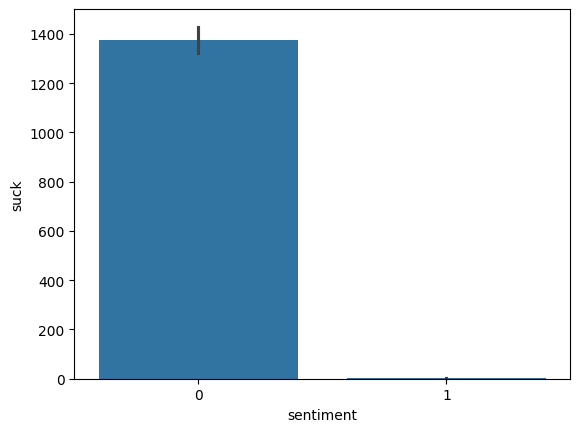

In [54]:
sns.barplot(x='sentiment', y='suck', data=train_df3, estimator=sum)
plt.show()

<ipython-input-62-45ac494836ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='love', data=train_df3, estimator=sum, palette='viridis')


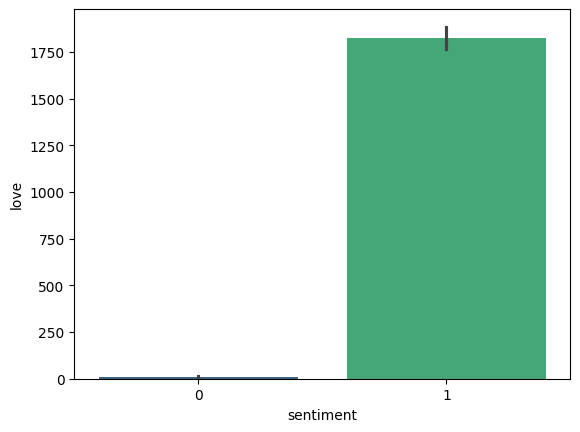

In [62]:
sns.barplot(x='sentiment', y='love', data=train_df3, estimator=sum, palette='viridis')
plt.show()

<ipython-input-61-dd462e736455>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='realli', data=train_df3, estimator=sum, palette='viridis')


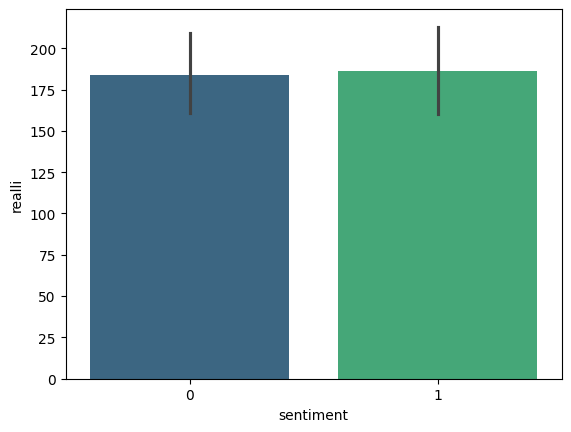

In [61]:
sns.barplot(x='sentiment', y='realli', data=train_df3, estimator=sum, palette='viridis')
plt.show()


## Naive Bayes Model

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4842, 1000), (2076, 1000), (4842,), (2076,))

In [66]:
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
bernoulli.fit(X_train,y_train)

BernoulliNB()

In [67]:
y_pred = bernoulli.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



<Axes: >

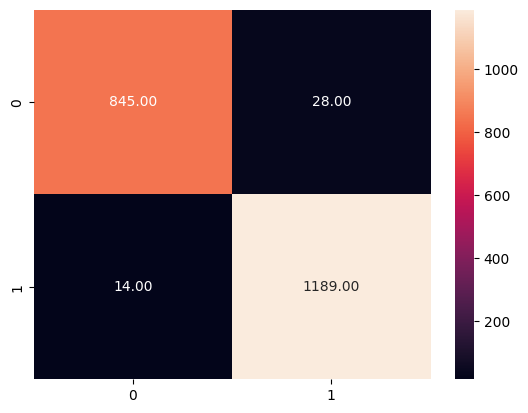

In [71]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt = '.2f')

## TF-IDF Vectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=stem_words, max_features=1000)
feature_vector = tfidf.fit(train_df['text'])
train_df_features = tfidf.transform(train_df['text'])
features = feature_vector.get_feature_names_out()

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(), y_train)

y_pred = gaussian.predict(X_test.toarray())
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       873
           1       0.97      0.97      0.97      1203

    accuracy                           0.97      2076
   macro avg       0.97      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



<Axes: >

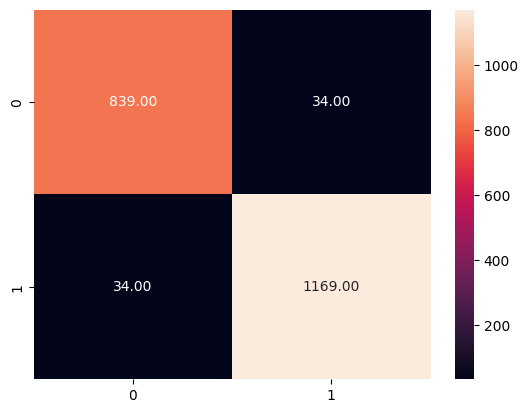

In [75]:
cm1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm1, annot=True, fmt = '.2f')

## Using of n-Grams

In [76]:
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()

def get_stemmed_tokens(document):
  all_tokens = [word for word in nltk.tokenize.word_tokenize(document)]
  clean_text = []

  for each_token in all_tokens:
    if re.search('[a-zA-Z]', each_token):
      clean_text.append(each_token)
    stem_token = [stemmer.stem(t) for t in clean_text]
    return stem_token

In [81]:
import nltk
nltk.download('punkt')

my_stop_words_list = list(my_stop_words)
tfidf = TfidfVectorizer(tokenizer=get_stemmed_tokens, max_features=700, stop_words=my_stop_words_list, ngram_range=(1,2))
feature_vector = tfidf.fit(train_df['text'])
train_df_features = tfidf.transform(train_df['text'])
features = feature_vector.get_feature_names_out()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_df_features, train_df.sentiment, test_size=0.3, random_state=42)

gaussian = GaussianNB()
gaussian.fit(X_train.toarray(), y_train)

y_pred = gaussian.predict(X_test.toarray())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61       873
           1       0.96      0.09      0.16      1203

    accuracy                           0.47      2076
   macro avg       0.70      0.54      0.39      2076
weighted avg       0.74      0.47      0.35      2076



<Axes: >

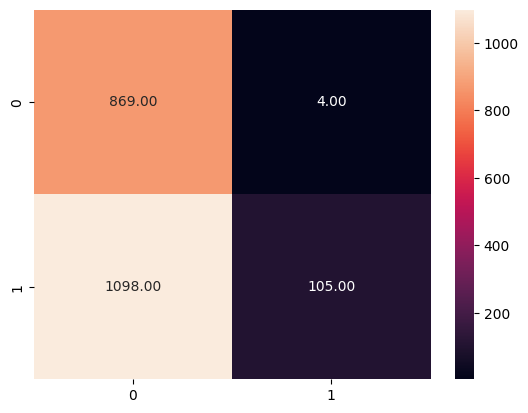

In [83]:
cm2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm2, annot=True, fmt = '.2f')